## Imports

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Read the data

In [99]:
project_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(project_dir, 'data', 'raw', 'customer_churn_dataset-training-master.csv')
test_data_dir = os.path.join(project_dir, 'data', 'raw', 'customer_churn_dataset-testing-master.csv')

In [100]:
df = pd.read_csv(data_dir)

In [101]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [102]:
df.drop(columns='CustomerID', inplace=True)

In [103]:
print(df.isna().sum())

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [104]:
df.dropna(inplace=True)

Prepare test data.

In [105]:
df_test = pd.read_csv(os.path.join(project_dir, 'data', 'raw', 'customer_churn_dataset-testing-master.csv'))
df_test.dropna(inplace=True)
df_test.drop(columns='CustomerID', inplace=True)

Convert data types

In [106]:
int_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
for col in int_cols:
    df[col] = df[col].astype('int64')
    df_test[col] = df_test[col].astype('int64')

categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    df[col] = df[col].astype('category')
    df_test[col] = df_test[col].astype('category')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Age                440832 non-null  int64   
 1   Gender             440832 non-null  category
 2   Tenure             440832 non-null  int64   
 3   Usage Frequency    440832 non-null  int64   
 4   Support Calls      440832 non-null  int64   
 5   Payment Delay      440832 non-null  int64   
 6   Subscription Type  440832 non-null  category
 7   Contract Length    440832 non-null  category
 8   Total Spend        440832 non-null  int64   
 9   Last Interaction   440832 non-null  int64   
 10  Churn              440832 non-null  int64   
dtypes: category(3), int64(8)
memory usage: 31.5 MB


In [108]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.344771,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.722712,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


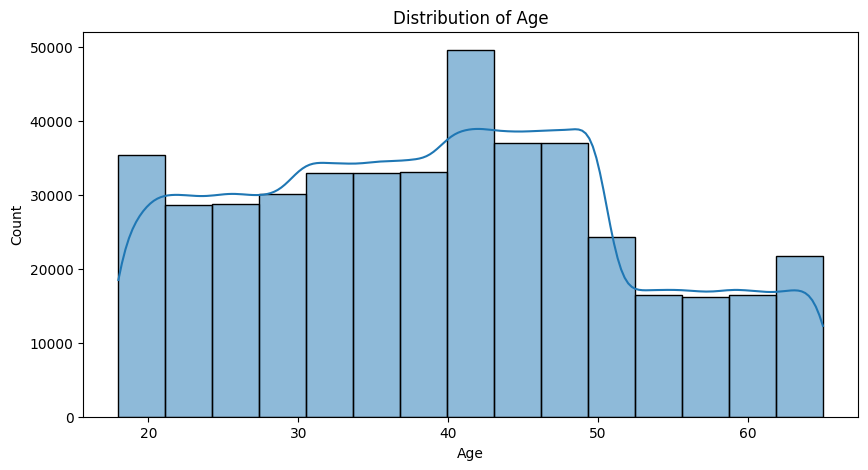

In [109]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

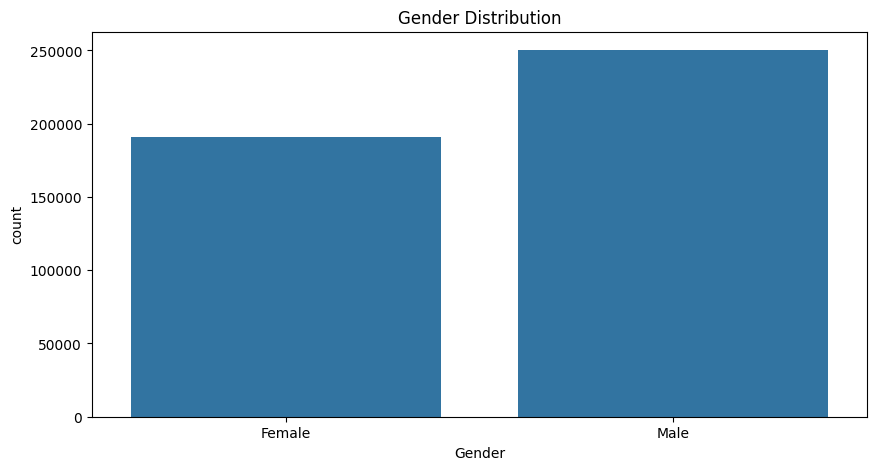

In [110]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

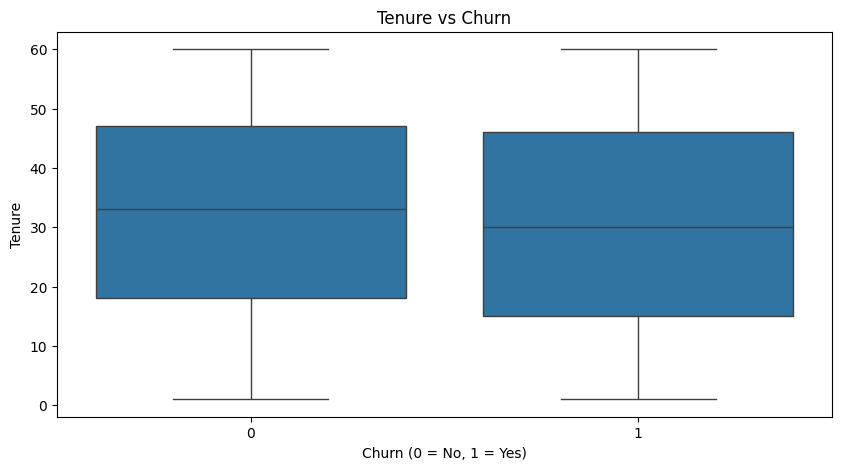

In [111]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.show()

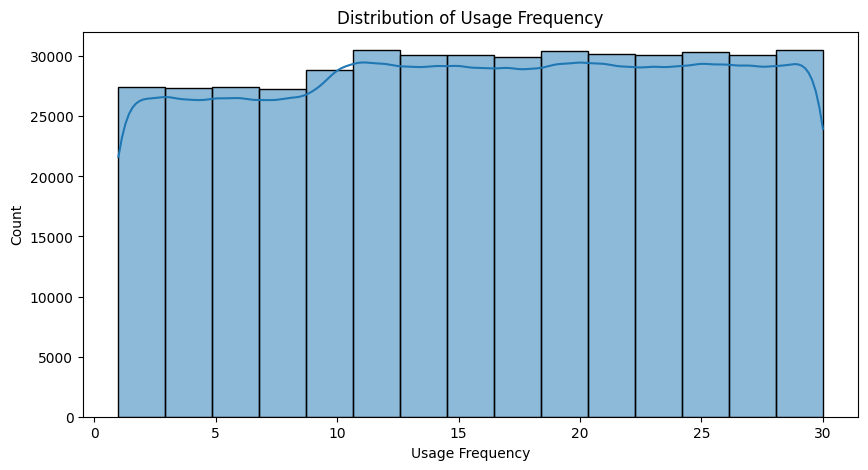

In [112]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Usage Frequency'], bins=15, kde=True)
plt.title('Distribution of Usage Frequency')
plt.xlabel('Usage Frequency')
plt.show()

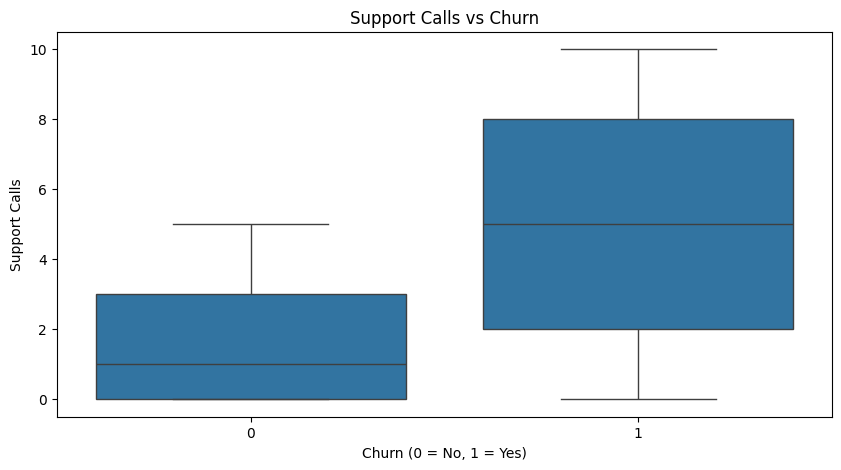

In [113]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Support Calls', data=df)
plt.title('Support Calls vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.show()

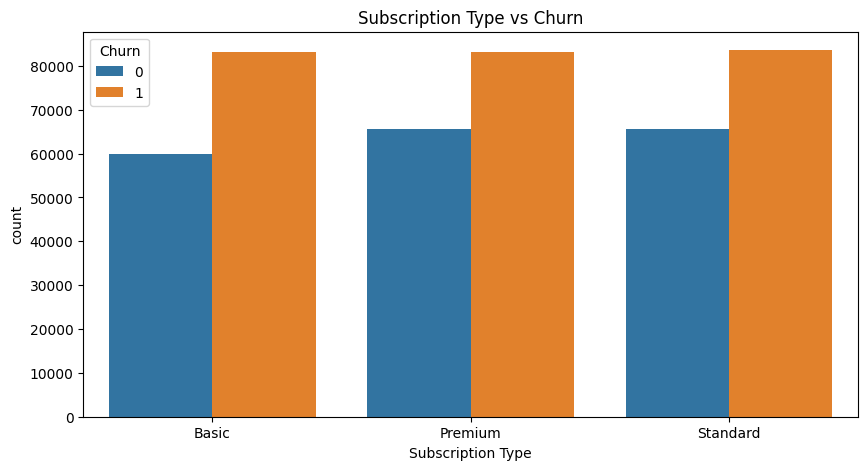

In [114]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title('Subscription Type vs Churn')
plt.show()

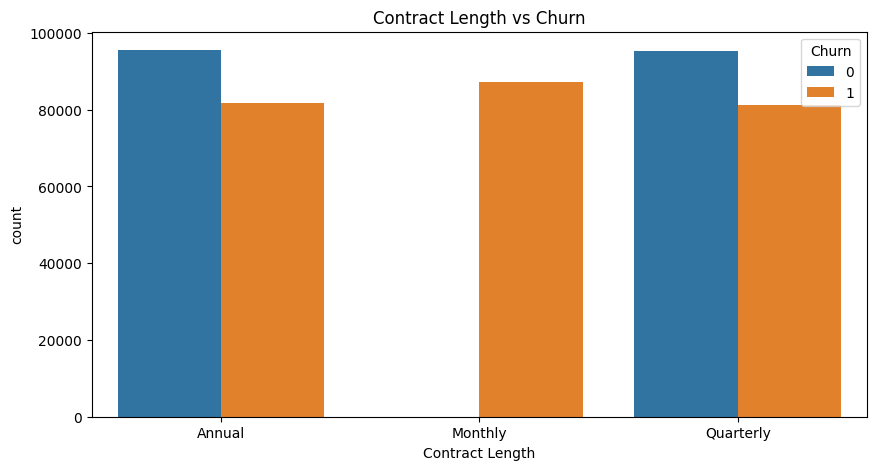

In [115]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Contract Length', hue='Churn', data=df)
plt.title('Contract Length vs Churn')
plt.show()

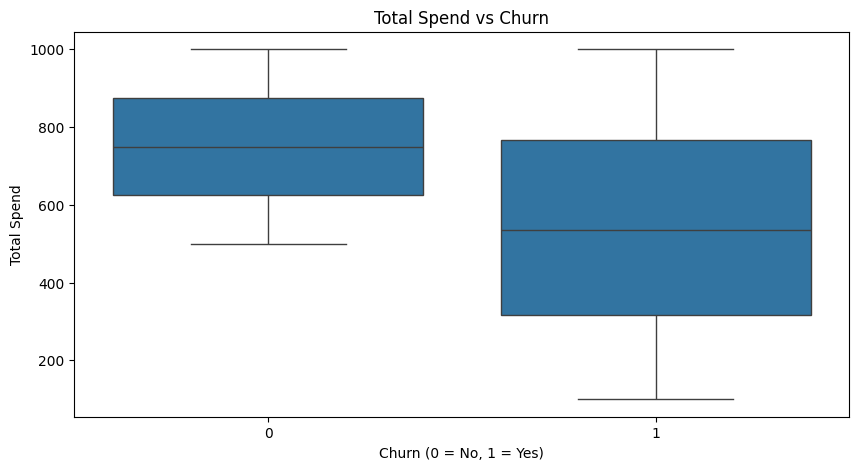

In [116]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='Total Spend', data=df)
plt.title('Total Spend vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.show()

In [117]:
gender_map = {'Male': 0, 'Female': 1}
subscription_map = {'Basic': 0, 'Premium': 1, 'Pro': 2}
Contract_Length = {'Annual': 0, 'Quarterly': 1, 'Monthly' : 2}

In [118]:
df['Gender'] = df['Gender'].map(gender_map)
df['Subscription Type'] = df['Subscription Type'].map(subscription_map)
df['Contract Length'] = df['Contract Length'].map(Contract_Length)
df_test['Gender'] = df_test['Gender'].map(gender_map)
df_test['Subscription Type'] = df_test['Subscription Type'].map(subscription_map)
df_test['Contract Length'] = df_test['Contract Length'].map(Contract_Length)

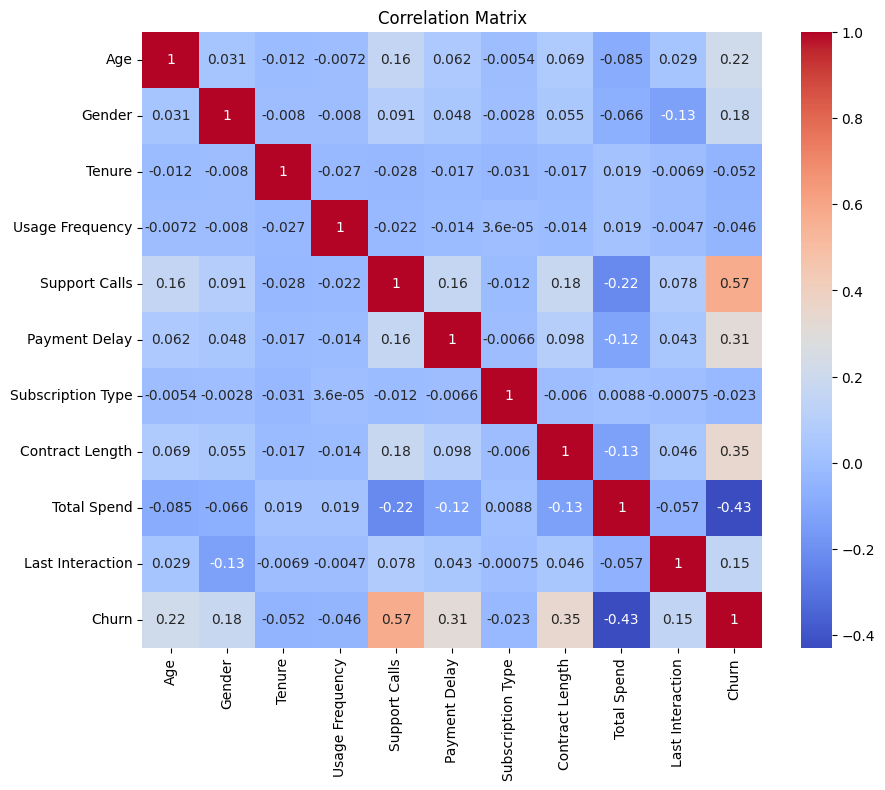

In [119]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [120]:
threshold = 0.03

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Churn"]) > threshold].tolist()
high_corr_features.remove("Churn")
print(high_corr_features)

['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Contract Length', 'Total Spend', 'Last Interaction']


In [121]:
X_train = df[high_corr_features]
y_train = df["Churn"]
X_test = df_test[high_corr_features]
y_test = df_test['Churn']

## Build Deep Learning Model

Create TensorBoard logger

In [ ]:
logger1 = TensorBoard(
    log_dir=os.path.join(project_dir, 'models', 'logs', 'model1'),
    histogram_freq=5,
    write_graph=True,
    write_images=True
)

Scale the features and target

In [123]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build the model

In [124]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

c:\Users\uif93590\Desktop\SoftwareProjects\customer-churn-analysis\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [ ]:
history = model1.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[logger1])

Epoch 1/25


KeyboardInterrupt: 

In [ ]:
model1.save(os.path.join(project_dir, 'models', 'model1.keras'))

Predict

In [ ]:
y_pred_prob = model1.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary (0 or 1)

Plot Training & Validation Accuracy

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Training Performance')
plt.legend()
plt.show()

Model1 Performance

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nANN Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Plot Training & Validation Accuracy

The model was overfitting severely. Let's solve this with trying the following steps:
* Reduce the number of epochs
* Use Early Stopping
* Increase Dropout
* Use fewer neurons
* Try different optimizer (e.g. SGD)